In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
font = {'family': 'arial', 'color': 'black', 'weight': 'normal', 'size': 70}

blau = (51/256,145/256,202/256)
rot = (219/256, 72/256, 72/256)
gruen = (120/256, 180/256, 88/256)
orange = (246/256, 174/256, 60/256)

In [3]:
folder = "M:\\Projekte\\OE210\\100424_itsowl-TP-CMB\\Arbeitsverzeichnis\\00_Messungen\\03_Gurtalterung\\01_Ultraschall\\Test Background\\"

file_bg = "Background.csv"
file_bs850 = "Becherseite_d850.csv"
file_bs1000 = "Becherseite_d1000.csv"
file_ls850 = "Laufseite_d850.csv"
file_ls1000 = "Laufseite_d1000.csv"

In [19]:
# read csv file
dfbg = pd.read_csv(str(folder + file_bg), sep=',')
# delete/drop last column with NaNs
dfbg = dfbg.drop(labels = dfbg.columns.values[-1], axis=1)

# create dict to rename columns
header_dict = {}
old_head = dfbg.columns.values
new_head = dfbg.columns.values[1:]
new_head = np.append(new_head, "offset")
for i in range(len(old_head)):
    header_dict[old_head[i]] = new_head[i]
dfbg = dfbg.rename(columns=header_dict)

#convert string values to numeric
dfbg = dfbg.apply(pd.to_numeric)

# delete/drop last column --> offset in data; why is not clear!
dfbg = dfbg.drop(labels = dfbg.columns.values[-1], axis=1)

dfbg

,Range mm,Amplitude,i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],...,q[106],q[107],q[108],q[109],q[110],q[111],q[112],q[113],q[114],q[115]
797,1026,88,15870,0,254,1829,4396,4824,2572,632,...,128,-39,-166,-219,-209,-157,-97,-77,-136,-235
798,942,81,426,0,253,1817,4368,4808,2584,646,...,107,-92,-251,-318,-257,-97,62,130,61,-99
799,942,12,489,0,254,1828,4395,4831,2593,664,...,85,-121,-268,-319,-287,-188,-63,7,-35,-142
800,942,56,506,0,254,1828,4397,4825,2570,630,...,81,-145,-337,-418,-339,-147,50,136,61,-97
801,940,5,550,0,254,1828,4396,4829,2581,646,...,144,-93,-344,-485,-394,-103,215,371,302,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,942,69,568,0,252,1815,4363,4788,2543,600,...,194,407,582,618,443,99,-245,-429,-449,-398
1418,939,69,575,0,254,1825,4385,4815,2571,627,...,297,318,307,243,114,-32,-147,-218,-290,-385
1419,940,94,564,0,252,1811,4361,4808,2592,662,...,231,341,390,362,241,47,-163,-310,-378,-395
1420,940,94,536,0,253,1821,4385,4831,2600,660,...,261,382,429,366,205,5,-182,-313,-372,-374


In [7]:
# read csv file
dfbs850 = pd.read_csv(str(folder + file_bs850), sep=',')
# delete/drop last column with NaNs
dfbs850 = dfbs850.drop(labels = dfbs850.columns.values[-1], axis=1)

# create dict to rename columns
header_dict = {}
old_head = dfbs850.columns.values
new_head = dfbs850.columns.values[1:]
new_head = np.append(new_head, "offset")
for i in range(len(old_head)):
    header_dict[old_head[i]] = new_head[i]
dfbs850 = dfbs850.rename(columns=header_dict)

#convert string values to numeric
dfbs850 = dfbs850.apply(pd.to_numeric)

# delete/drop last column --> offset in data; why is not clear!
dfbs850 = dfbs850.drop(labels = dfbs850.columns.values[-1], axis=1)

dfbs850

,Range mm,Amplitude,i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],...,q[106],q[107],q[108],q[109],q[110],q[111],q[112],q[113],q[114],q[115]
6036,853,38,8544,0,248,1789,4313,4752,2551,640,...,730,986,570,-62,-433,-448,-280,-181,-314,-738
6037,853,62,8482,0,248,1785,4296,4712,2495,598,...,-218,132,251,175,7,-129,-148,-87,-86,-339
6038,854,6,8474,0,247,1783,4299,4728,2518,604,...,-867,-615,-118,305,373,185,27,57,227,304
6039,853,38,8449,0,247,1784,4296,4725,2517,601,...,210,541,444,137,-127,-228,-172,-89,-153,-496
6040,853,5,8545,0,245,1773,4271,4688,2488,597,...,382,748,532,54,-293,-354,-206,-91,-211,-645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,854,6,8635,0,246,1780,4291,4710,2491,576,...,-535,-223,80,220,175,98,113,173,158,-90
6662,854,6,8668,0,245,1770,4267,4684,2473,579,...,-978,-743,-227,191,267,146,81,151,261,188
6663,854,31,8656,0,245,1771,4274,4697,2486,579,...,-1130,-953,-357,221,406,280,115,95,238,342
6664,854,6,8639,0,246,1777,4281,4707,2510,604,...,-737,-447,-55,197,201,103,73,130,175,26


In [8]:
# read csv file
dfbs1000 = pd.read_csv(str(folder + file_bs1000), sep=',')
# delete/drop last column with NaNs
dfbs1000 = dfbs1000.drop(labels = dfbs1000.columns.values[-1], axis=1)

# create dict to rename columns
header_dict = {}
old_head = dfbs850.columns.values
new_head = dfbs850.columns.values[1:]
new_head = np.append(new_head, "offset")
for i in range(len(old_head)):
    header_dict[old_head[i]] = new_head[i]
dfbs1000 = dfbs1000.rename(columns=header_dict)

#convert string values to numeric
dfbs1000 = dfbs1000.apply(pd.to_numeric)

# delete/drop last column --> offset in data; why is not clear!
dfbs1000 = dfbs1000.drop(labels = dfbs1000.columns.values[-1], axis=1)

dfbs1000

,Index,Amplitude,i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],...,q[106],q[107],q[108],q[109],q[110],q[111],q[112],q[113],q[114],q[115]
0,251,0,65488,-123,103,672,914,598,231,65,...,-342,-492,-432,-156,230,572,733,682,507,311
1,252,0,65489,-120,115,684,892,540,181,47,...,-183,-361,-315,-41,349,692,823,685,426,256
2,253,0,65487,-138,59,606,843,536,198,60,...,-273,-428,-376,-111,293,665,810,697,483,313
3,254,0,65487,-136,71,631,872,550,186,38,...,-345,-468,-389,-117,277,622,753,656,441,243
4,255,0,65488,-131,82,644,878,545,169,15,...,-383,-473,-398,-119,296,670,830,716,439,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,907,0,65486,-133,95,684,927,578,193,48,...,-617,-589,-435,-214,30,248,389,432,353,123
657,908,0,65486,-140,61,621,864,541,177,29,...,-455,-471,-396,-224,24,270,418,455,378,156
658,909,0,65487,-137,62,607,840,529,182,40,...,-221,-235,-255,-288,-325,-331,-256,-91,41,5
659,910,0,65489,-126,83,639,884,572,210,54,...,-88,12,-12,-211,-492,-698,-684,-434,-153,-39


In [9]:
# read csv file
dfls850 = pd.read_csv(str(folder + file_ls850), sep=',')
# delete/drop last column with NaNs
dfls850 = dfls850.drop(labels = dfls850.columns.values[-1], axis=1)

# create dict to rename columns
header_dict = {}
old_head = dfls850.columns.values
new_head = dfls850.columns.values[1:]
new_head = np.append(new_head, "offset")
for i in range(len(old_head)):
    header_dict[old_head[i]] = new_head[i]
dfls850 = dfls850.rename(columns=header_dict)

#convert string values to numeric
dfls850 = dfls850.apply(pd.to_numeric)

# delete/drop last column --> offset in data; why is not clear!
dfls850 = dfls850.drop(labels = dfls850.columns.values[-1], axis=1)

dfls850

,Range mm,Amplitude,i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],...,q[106],q[107],q[108],q[109],q[110],q[111],q[112],q[113],q[114],q[115]
7297,860,12,3177,0,246,1780,4287,4709,2498,587,...,-54,-29,-20,3,5,-39,-97,-141,-186,-219
7298,859,56,3169,0,247,1781,4284,4695,2485,588,...,85,289,381,313,114,-119,-282,-323,-286,-220
7299,860,3175,0,246,1777,4281,4704,2497,597,44,...,231,309,254,96,-61,-135,-142,-143,-145,-114
7300,860,12,3185,0,247,1790,4318,4744,2516,601,...,-112,18,132,156,67,-66,-153,-174,-182,-189
7301,859,81,3144,0,245,1774,4282,4718,2530,640,...,-83,166,343,372,208,-84,-332,-415,-366,-259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7946,855,81,2657,0,247,1783,4301,4743,2541,620,...,-16,109,175,133,22,-98,-175,-181,-155,-138
7947,856,19,2707,0,246,1777,4283,4708,2502,587,...,82,278,413,386,196,-73,-285,-319,-214,-105
7948,855,81,2675,0,246,1776,4274,4694,2501,610,...,-40,-15,-8,-9,-3,5,26,53,21,-73
7949,855,81,2687,0,249,1791,4306,4722,2506,600,...,27,149,228,213,98,-55,-156,-163,-129,-103


In [10]:
# read csv file
dfls1000 = pd.read_csv(str(folder + file_ls1000), sep=',')
# delete/drop last column with NaNs
dfls1000 = dfls1000.drop(labels = dfls1000.columns.values[-1], axis=1)

# create dict to rename columns
header_dict = {}
old_head = dfls1000.columns.values
new_head = dfls1000.columns.values[1:]
new_head = np.append(new_head, "offset")
for i in range(len(old_head)):
    header_dict[old_head[i]] = new_head[i]
dfls1000 = dfls1000.rename(columns=header_dict)

#convert string values to numeric
dfls1000 = dfls1000.apply(pd.to_numeric)

# delete/drop last column --> offset in data; why is not clear!
dfls1000 = dfls1000.drop(labels = dfls1000.columns.values[-1], axis=1)

dfls1000

,Range mm,Amplitude,i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],...,q[106],q[107],q[108],q[109],q[110],q[111],q[112],q[113],q[114],q[115]
2093,1003,62,4824,0,250,1806,4353,4773,2514,576,...,56,282,459,466,250,-107,-425,-558,-488,-310
2094,1003,25,4825,0,249,1792,4309,4726,2505,596,...,131,295,386,338,136,-148,-378,-457,-394,-261
2095,1003,4831,0,249,1788,4303,4730,2527,624,56,...,322,321,253,102,-69,-180,-199,-173,-155,-141
2096,1003,25,4870,0,248,1790,4317,4757,2551,638,...,147,313,422,401,200,-121,-395,-471,-381,-263
2097,1003,38,4927,0,247,1785,4303,4735,2528,616,...,56,243,412,438,228,-131,-448,-588,-530,-362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,1004,31,4933,0,248,1792,4315,4736,2508,597,...,91,261,391,410,252,-27,-257,-336,-291,-195
2702,1003,62,4831,0,248,1788,4306,4732,2522,622,...,159,367,503,487,300,3,-264,-378,-350,-246
2703,1004,31,4829,0,248,1791,4315,4744,2515,585,...,221,368,505,513,313,-14,-281,-364,-294,-162
2704,1003,94,4739,0,249,1793,4322,4757,2544,646,...,9,219,436,518,356,11,-311,-442,-370,-191


In [20]:
# create lists with columns names to calculate amplitudes
ivalues = []
qvalues = []

for i in range(116):
    ivalues.append(str("i["+str(i)+"]"))
    qvalues.append(str("q["+str(i)+"]"))
    

# calculate amplitudes and write to lists
data = []
for ind in range(dfbg.index.values.min(),dfbg.index.values.max()):
    amplitudes = []
    for i in range(len(ivalues)):
        amp = np.sqrt(dfbg[dfbg.index==ind][ivalues[i]].values[0]**2+dfbg[dfbg.index==ind][qvalues[i]].values[0]**2)
        amplitudes.append(amp)
    data.append(amplitudes)
    
dfbg = pd.DataFrame(data = data, columns = np.linspace(20,2000,len(ivalues)))
dfbg = dfbg.T
dfbg

,0,1,2,3,4,5,6,7,8,9,...,614,615,616,617,618,619,620,621,622,623
20.000000,15871.009451,506.509625,524.978095,624.493395,652.457661,593.137421,625.179974,584.906830,671.936009,665.776239,...,558.144247,591.663756,618.465844,618.864282,526.459875,651.448386,601.192981,576.681021,586.529624,552.014493
37.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54.434783,258.495648,256.970815,257.955423,257.955423,257.955423,258.768236,259.924989,257.782854,258.600077,256.970815,...,258.600077,258.495648,255.180328,255.812431,258.940148,256.970815,256.164010,258.311827,256.164010,257.513106
71.652174,1834.123769,1820.635603,1831.427858,1831.934497,1832.000273,1835.239766,1839.788031,1834.483579,1834.893185,1831.002458,...,1837.003266,1833.829327,1816.966978,1816.921848,1836.666818,1822.444787,1819.095654,1829.140235,1815.377922,1825.423239
88.869565,4396.319483,4369.190772,4396.478250,4397.983402,4396.727874,4403.300240,4409.743983,4410.322551,4405.977758,4400.745505,...,4411.857205,4406.464796,4373.946730,4370.243014,4414.132871,4377.537207,4363.887373,4386.050729,4361.662183,4385.882921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931.130435,163.600122,97.000000,188.000000,151.584960,192.815974,224.474943,259.023165,184.024455,234.804174,155.618122,...,116.468880,43.737855,180.294204,182.439031,202.299283,113.569362,255.001961,90.824006,66.468037,194.064422
1948.347826,299.162163,314.178293,334.977611,256.912436,353.022662,281.432052,314.085975,242.903273,270.408950,261.017241,...,392.390112,290.000000,255.861291,194.030925,239.520354,228.265197,246.375729,259.624729,224.931101,198.406149
1965.565217,476.265682,496.327513,491.049896,461.494312,493.879540,460.630003,496.620580,480.277003,455.508507,509.982353,...,563.107450,429.284288,450.818145,355.236541,425.793377,417.412266,440.728942,447.666170,406.532901,382.007853
1982.782609,466.274597,471.958685,444.380468,488.821031,446.592656,437.498571,458.519356,515.197050,477.649453,540.557120,...,531.797894,411.810636,405.774568,346.913534,452.553864,424.075465,452.991170,456.846801,417.813355,400.359838


In [21]:
# create lists with columns names to calculate amplitudes
ivalues = []
qvalues = []

for i in range(116):
    ivalues.append(str("i["+str(i)+"]"))
    qvalues.append(str("q["+str(i)+"]"))
    

# calculate amplitudes and write to lists
data = []
for ind in range(dfbs850.index.values.min(), dfbs850.index.values.max()):
    amplitudes = []
    for i in range(len(ivalues)):
        amp = np.sqrt(dfbs850[dfbs850.index==ind][ivalues[i]].values[0]**2+dfbs850[dfbs850.index==ind][qvalues[i]].values[0]**2)
        amplitudes.append(amp)
    data.append(amplitudes)
    
dfbs850 = pd.DataFrame(data = data, columns = np.linspace(20,2000,len(ivalues)))
dfbs850 = dfbs850.T
dfbs850

,0,1,2,3,4,5,6,7,8,9,...,619,620,621,622,623,624,625,626,627,628
20.000000,8548.077679,8555.494433,8596.992323,8505.875910,8558.136538,8507.395195,8589.126906,8693.743555,8661.635469,8618.601743,...,8403.715488,8359.240934,8422.455283,8532.801650,8564.337511,8616.781592,8731.269896,8798.197997,8776.772584,8755.737890
37.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54.434783,253.392975,253.392975,252.833938,252.833938,250.880450,252.210230,251.230969,251.857102,253.810953,252.414342,...,250.880450,252.073402,252.073402,250.880450,252.293480,251.644591,251.857102,251.097591,251.318523,251.857102
71.652174,1795.361245,1790.960915,1790.075417,1791.706449,1780.294919,1790.960915,1783.661403,1784.369076,1794.967409,1786.225350,...,1778.762772,1783.027201,1786.493773,1783.648228,1786.788460,1780.845866,1787.266348,1777.674042,1779.527184,1784.278566
88.869565,4313.194872,4296.418974,4299.150730,4296.011639,4271.085342,4301.326540,4277.640120,4275.061871,4311.090929,4283.280285,...,4267.026365,4271.037930,4289.009443,4279.037859,4283.009456,4275.143272,4291.119318,4267.061987,4274.005732,4281.085143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931.130435,518.987476,476.782969,548.161473,474.383811,514.242161,446.574742,499.884987,501.223503,535.494164,485.627429,...,494.580630,485.420436,475.925414,445.543488,451.488649,408.198481,425.440948,352.642879,407.450611,387.923962
1948.347826,297.321375,250.415654,298.224747,237.655212,254.238077,165.435788,247.487373,266.443240,270.431137,235.193537,...,205.372832,210.116634,191.441897,181.837840,182.543146,133.461605,182.258059,87.091905,128.798292,149.093930
1965.565217,215.522621,163.981706,171.735261,152.633548,155.425223,58.694122,141.852036,172.652831,173.487752,153.707514,...,183.324848,169.640797,163.131849,190.538710,176.663522,146.112970,179.805450,160.031247,101.242284,154.236831
1982.782609,424.053063,380.837236,389.894858,393.005089,379.138497,296.892236,351.660347,393.605132,403.352203,383.520534,...,341.568441,350.178526,340.800528,368.184736,358.687887,326.585364,330.248391,363.496905,307.683279,410.202389


In [22]:
# create lists with columns names to calculate amplitudes
ivalues = []
qvalues = []

for i in range(116):
    ivalues.append(str("i["+str(i)+"]"))
    qvalues.append(str("q["+str(i)+"]"))
    

# calculate amplitudes and write to lists
data = []
for ind in range(dfbs1000.index.values.min(), dfbs1000.index.values.max()):
    amplitudes = []
    for i in range(len(ivalues)):
        amp = np.sqrt(dfbs1000[dfbs1000.index==ind][ivalues[i]].values[0]**2+dfbs1000[dfbs1000.index==ind][qvalues[i]].values[0]**2)
        amplitudes.append(amp)
    data.append(amplitudes)
    
dfbs1000 = pd.DataFrame(data = data, columns = np.linspace(20,2000,len(ivalues)))
dfbs1000 = dfbs1000.T
dfbs1000

,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,659
20.000000,65488.000000,65489.000000,65487.000000,65487.000000,65488.000000,65488.000000,65489.000000,65485.000000,65489.000000,65489.000000,...,65487.000000,65483.000000,65485.000000,65485.000000,65484.000000,65488.000000,65486.000000,65486.000000,65487.000000,65489.000000
37.217391,279.517441,279.112880,285.559101,286.356421,281.357424,284.597962,282.193196,290.877981,279.508497,277.416654,...,285.559101,292.453415,290.175809,291.384626,292.249893,278.172608,282.294173,285.658887,285.954542,278.172608
54.434783,1813.926680,1815.645615,1805.964009,1816.388174,1797.870963,1805.065096,1817.850379,1810.610118,1801.249844,1818.097907,...,1805.099720,1792.446373,1799.490206,1809.610455,1803.301971,1793.679180,1802.505201,1799.034463,1814.059812,1797.916850
71.652174,4404.565018,4407.399687,4393.989076,4413.341704,4378.618161,4384.799311,4418.017655,4396.685229,4372.536335,4420.343539,...,4390.143164,4366.950080,4370.689305,4392.409020,4390.685823,4364.357914,4390.606450,4372.324896,4410.964747,4382.832075
88.869565,4852.849884,4856.618165,4864.599675,4871.676611,4849.148894,4846.990819,4895.469130,4865.643020,4827.852732,4881.496185,...,4857.008338,4842.857008,4829.210391,4854.414177,4867.327090,4814.905710,4861.204892,4840.729800,4882.796330,4871.872022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931.130435,612.490816,703.921160,687.134630,689.701385,686.151587,705.056735,642.277199,684.984671,724.006215,673.344637,...,887.989302,915.678983,963.714169,959.487884,917.618657,925.447459,869.133477,927.183369,926.167371,899.904439
1948.347826,737.684214,857.000583,810.015432,756.627385,830.346915,766.997392,692.893210,729.177619,818.560932,779.108465,...,709.524489,727.325237,760.285473,793.731063,728.659042,731.194229,702.528291,747.745946,756.624081,876.447374
1965.565217,683.549559,736.658673,707.944207,667.248080,727.885293,661.061268,659.075868,639.344977,667.847288,672.580850,...,475.534436,450.818145,410.436353,470.068080,483.075563,407.976715,498.623104,530.102820,430.722649,568.370478
1982.782609,508.575461,463.249393,489.418022,456.513965,443.640620,467.779863,511.074359,439.113880,389.840993,434.294831,...,327.928346,282.235717,152.322027,215.520301,329.619478,212.115535,355.259060,382.890324,140.132081,178.530110


In [23]:
# create lists with columns names to calculate amplitudes
ivalues = []
qvalues = []

for i in range(116):
    ivalues.append(str("i["+str(i)+"]"))
    qvalues.append(str("q["+str(i)+"]"))
    

# calculate amplitudes and write to lists
data = []
for ind in range(dfls850.index.values.min(), dfls850.index.values.max()):
    amplitudes = []
    for i in range(len(ivalues)):
        amp = np.sqrt(dfls850[dfls850.index==ind][ivalues[i]].values[0]**2+dfls850[dfls850.index==ind][qvalues[i]].values[0]**2)
        amplitudes.append(amp)
    data.append(amplitudes)
    
dfls850 = pd.DataFrame(data = data, columns = np.linspace(20,2000,len(ivalues)))
dfls850 = dfls850.T
dfls850

,0,1,2,3,4,5,6,7,8,9,...,643,644,645,646,647,648,649,650,651,652
20.000000,3177.290984,3169.161561,0.000000,3186.134021,3144.040712,3155.040570,3100.723948,3246.796729,3123.537738,3183.492579,...,2671.203848,2615.234215,2665.108816,2652.561404,2702.056254,2667.587862,2659.153625,2711.903022,2677.179299,2690.802483
37.217391,0.000000,0.000000,251.644591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54.434783,251.644591,252.622248,1783.574501,252.622248,251.097591,251.230969,251.857102,251.230969,251.230969,252.517326,...,252.622248,251.857102,252.622248,251.644591,251.644591,252.517326,251.813423,252.073402,252.073402,253.970471
71.652174,1786.309044,1787.645658,4281.291978,1796.698361,1782.512833,1782.744513,1786.821200,1784.422035,1783.503294,1787.022664,...,1786.649378,1787.009233,1790.634524,1783.922084,1784.830524,1792.366592,1788.179242,1785.208671,1784.213272,1796.156174
88.869565,4287.352796,4284.196191,4746.532629,4318.176120,4282.002919,4280.449042,4288.016791,4291.783429,4288.803213,4283.215848,...,4284.205877,4284.001867,4298.205207,4285.151223,4294.186302,4308.066852,4301.602608,4283.000467,4274.000000,4306.743085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931.130435,112.946890,169.711520,439.259604,124.020160,113.278418,137.800581,173.528096,176.705970,150.455974,155.823618,...,139.441744,76.537572,82.734515,105.171289,106.794195,79.309520,118.152444,75.432089,77.162167,97.908120
1948.347826,441.780488,488.594924,540.969500,441.367194,448.807308,423.958724,456.212670,492.305799,444.527839,466.550104,...,410.785832,367.348608,358.468967,373.021447,399.664860,400.361087,392.206578,367.490136,400.844109,394.182699
1965.565217,529.132309,598.619245,417.268499,534.135751,549.386021,523.867350,541.081325,590.203355,524.649407,554.552973,...,447.235956,411.195817,402.314554,384.584191,435.440007,460.045650,461.017353,419.869027,438.216841,453.318872
1982.782609,406.988943,487.668945,226.497241,424.947056,438.220264,445.148290,433.619649,481.772768,402.077107,428.340986,...,260.048072,237.305710,236.864940,198.022726,243.944666,278.792037,321.790304,254.636997,234.940418,284.880677


In [24]:
# create lists with columns names to calculate amplitudes
ivalues = []
qvalues = []

for i in range(116):
    ivalues.append(str("i["+str(i)+"]"))
    qvalues.append(str("q["+str(i)+"]"))
    

# calculate amplitudes and write to lists
data = []
for ind in range(dfls1000.index.values.min(), dfls1000.index.values.max()):
    amplitudes = []
    for i in range(len(ivalues)):
        amp = np.sqrt(dfls1000[dfls1000.index==ind][ivalues[i]].values[0]**2+dfls1000[dfls1000.index==ind][qvalues[i]].values[0]**2)
        amplitudes.append(amp)
    data.append(amplitudes)
    
dfls1000 = pd.DataFrame(data = data, columns = np.linspace(20,2000,len(ivalues)))
dfls1000 = dfls1000.T
dfls1000

,0,1,2,3,4,5,6,7,8,9,...,602,603,604,605,606,607,608,609,610,611
20.000000,4824.567545,4825.033575,0.000000,4870.064168,4927.402764,4923.154477,4988.000100,5017.175799,5084.662132,5084.598313,...,5328.808966,5199.878652,5119.691885,5054.170753,4986.043421,4970.546952,4935.758706,4834.060922,4830.490762,4743.518736
37.217391,0.000000,0.000000,253.775491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54.434783,254.950976,253.970471,1793.317596,253.600079,252.210230,252.210230,254.756747,253.189652,253.189652,254.169235,...,253.189652,252.210230,253.189652,253.970471,252.990118,253.189652,252.990118,253.189652,253.189652,253.970471
71.652174,1811.731768,1796.928769,4303.553183,1796.698361,1790.798984,1793.869839,1810.964384,1794.947632,1802.253034,1802.253034,...,1797.022537,1794.280914,1796.308715,1803.211857,1796.156174,1798.614189,1797.617312,1793.869839,1796.463470,1798.934407
88.869565,4353.275778,4309.939791,4773.504897,4317.150102,4303.390872,4304.446538,4351.753899,4305.267588,4336.141257,4321.141747,...,4315.255960,4312.167436,4312.705415,4330.666923,4313.617739,4317.459670,4315.403342,4306.404184,4315.704925,4322.300892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931.130435,108.853112,177.504930,476.320270,142.358702,146.686741,142.126704,122.286549,125.717938,162.049375,159.326708,...,129.321305,16.492423,76.164296,129.417928,78.517514,69.339743,45.803930,30.149627,42.379240,12.083046
1948.347826,452.040927,507.077903,600.907647,501.503739,503.135171,501.522681,486.214973,490.697463,523.893119,524.432074,...,428.077096,312.161817,378.724174,435.790087,406.214229,393.960658,358.537306,358.810535,369.541608,330.552568
1965.565217,605.854768,635.777477,505.523491,635.072437,658.751091,630.248364,616.944892,638.023511,645.486638,649.850752,...,505.127707,417.336794,488.231502,544.415283,502.665893,512.711420,468.158093,507.745015,502.207129,471.097654
1982.782609,522.245153,536.406562,298.412466,506.672478,572.703239,517.150848,512.734824,554.279713,515.490058,512.200156,...,355.060558,297.934557,374.327397,398.909764,378.005291,375.755239,357.694003,415.543018,393.137381,378.762459


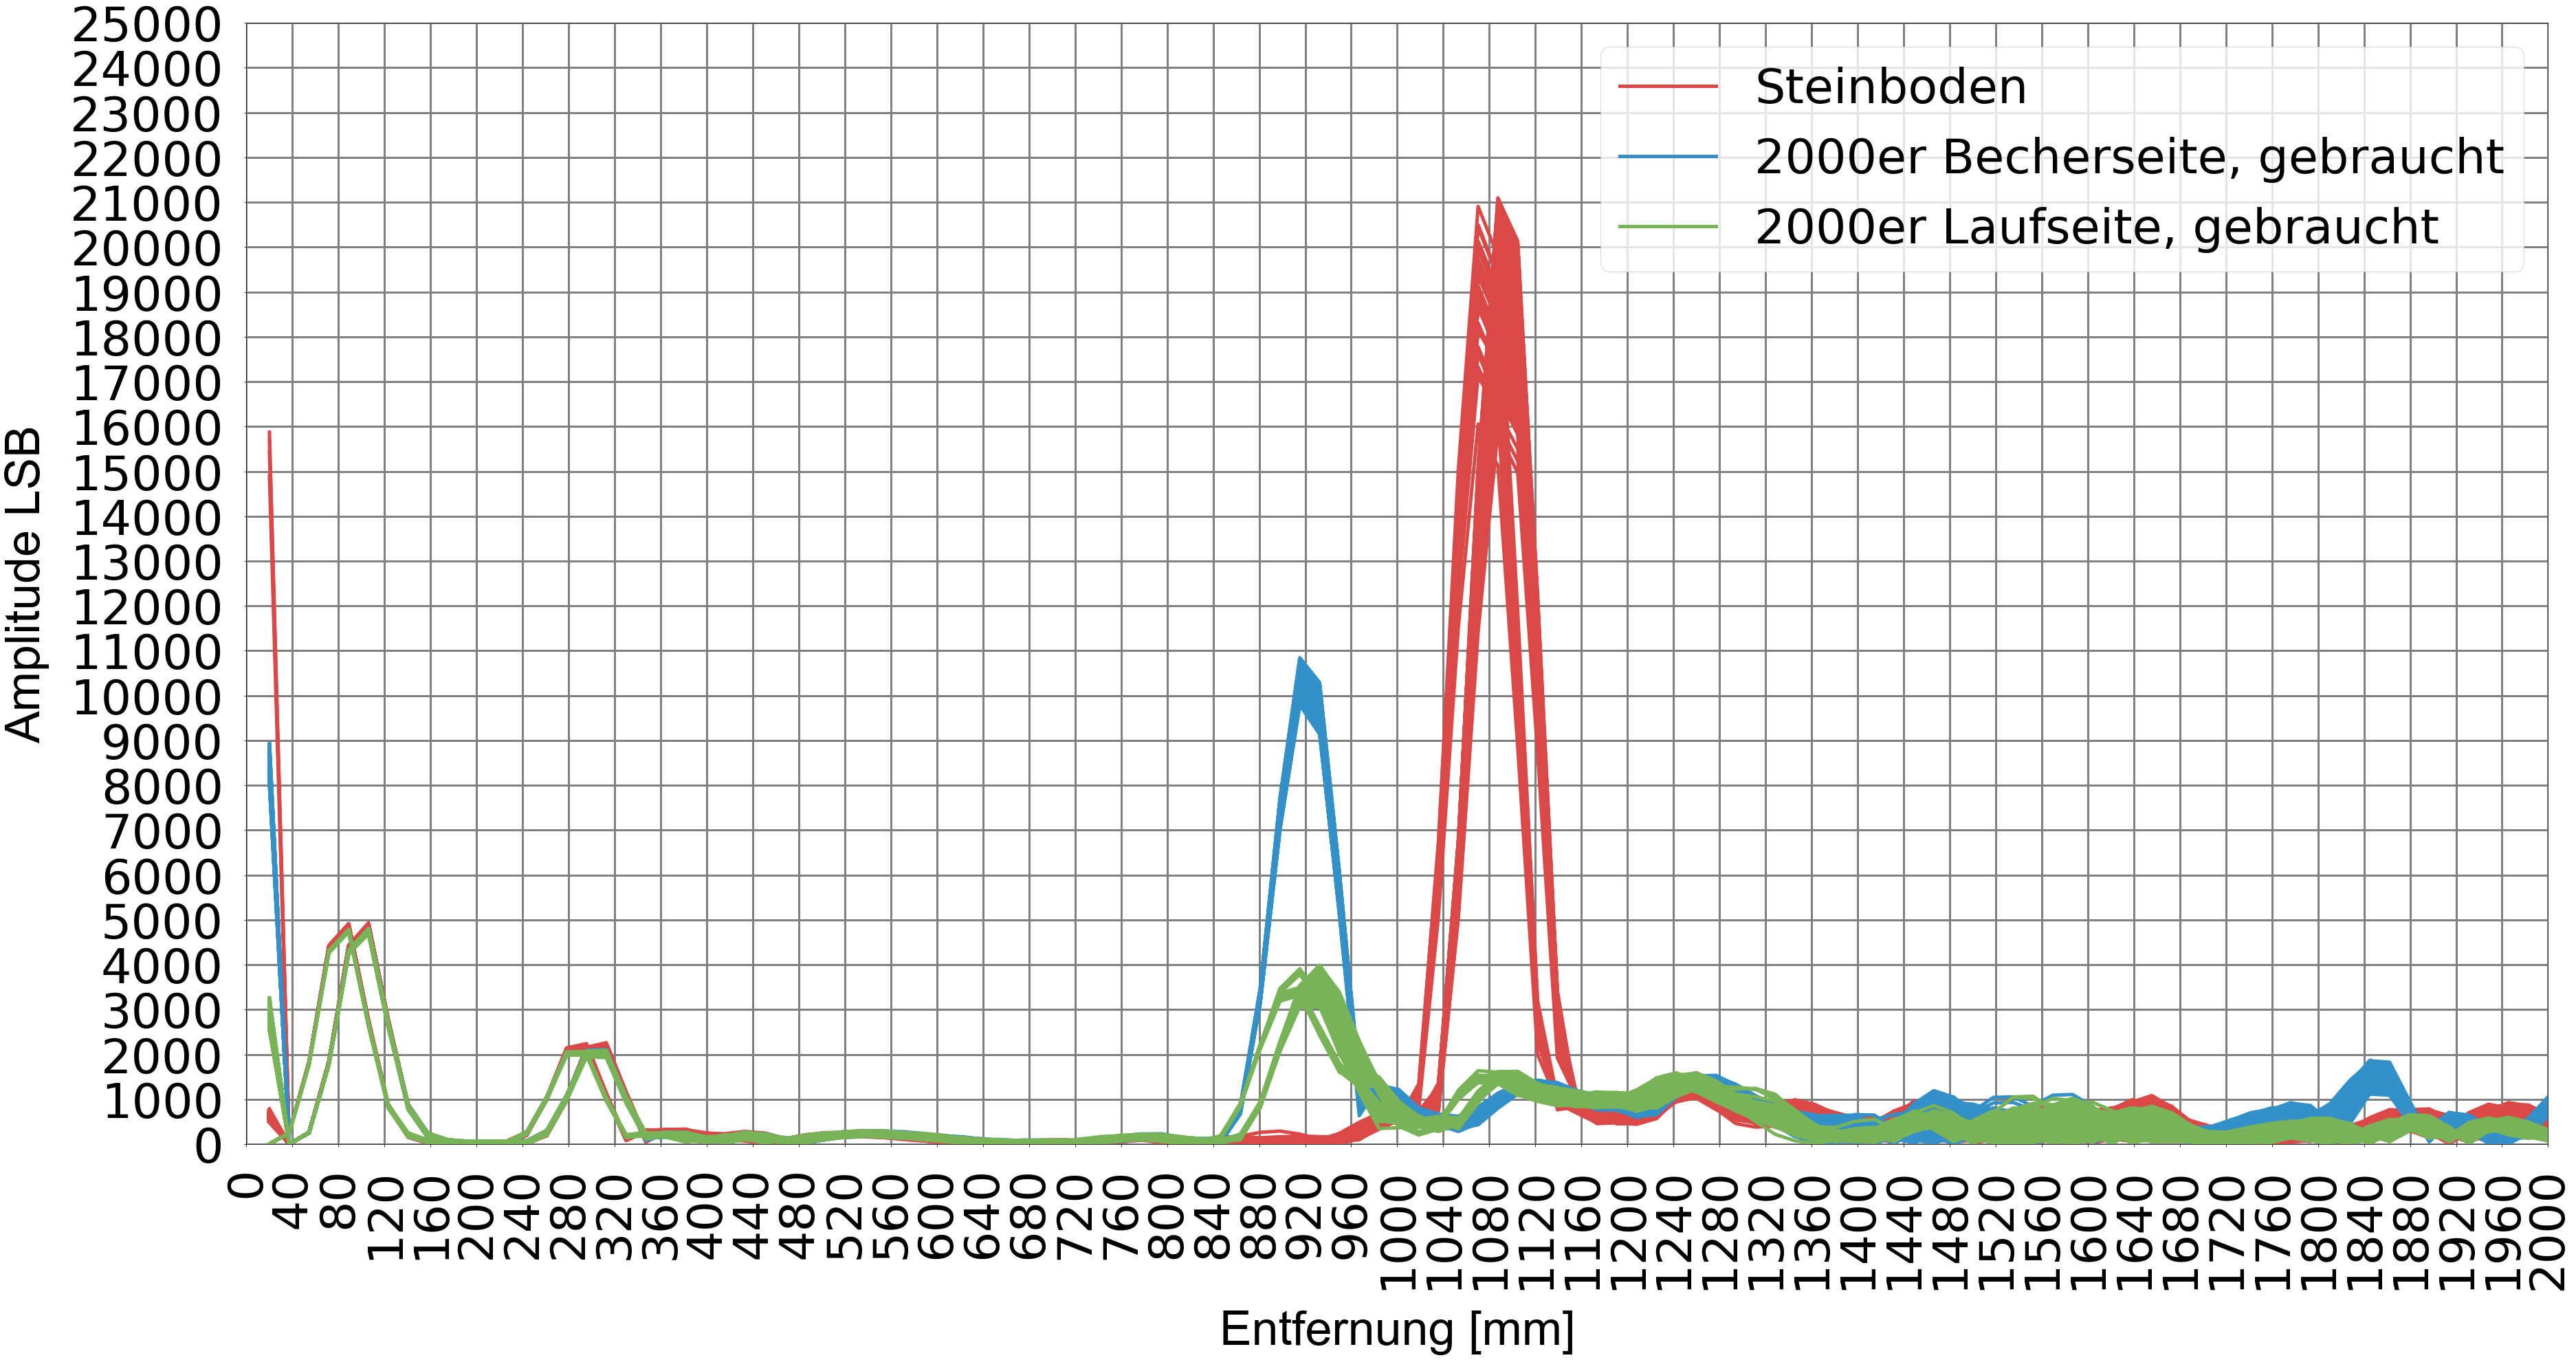

"\nif store != 0:\n    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'\n    figname = figname.replace(' ','_')\n    figname = figname.replace(':','-')\n    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)\n"

In [30]:
#plotname = 'Boden, Gurt 2000 alt, 850mm und 1000mm Entfernung'

nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)
#store = '04_features'

for j in range(len(dfbg.columns.values)):
    axs.plot(dfbg.index.values, dfbg[j], linewidth=5, color=rot)
axs.plot(dfbg.index.values, dfbg[j], linewidth=5, color=rot, label="Steinboden")
for i in range(len(dfbs850.columns.values)):
    axs.plot(dfbs850.index.values, dfbs850[i], linewidth=5, color=blau)
axs.plot(dfbs850.index.values, dfbs850[i], linewidth=5, color=blau, label="2000er Becherseite, gebraucht")
for i in range(len(dfls850.columns.values)):
    axs.plot(dfls850.index.values, dfls850[i], linewidth=5, color=gruen)
axs.plot(dfls850.index.values, dfls850[i], linewidth=5, color=gruen, label="2000er Laufseite, gebraucht")


axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlim(0,1000)
axs.set_ylim(0,25000)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,2000,51))
axs.set_yticks(np.linspace(0,25000,26))
axs.grid(True, axis='both', linewidth=3, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles, lables, fontsize=70, loc="best")

plt.show()

"""
if store != 0:
    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'
    figname = figname.replace(' ','_')
    figname = figname.replace(':','-')
    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)
"""

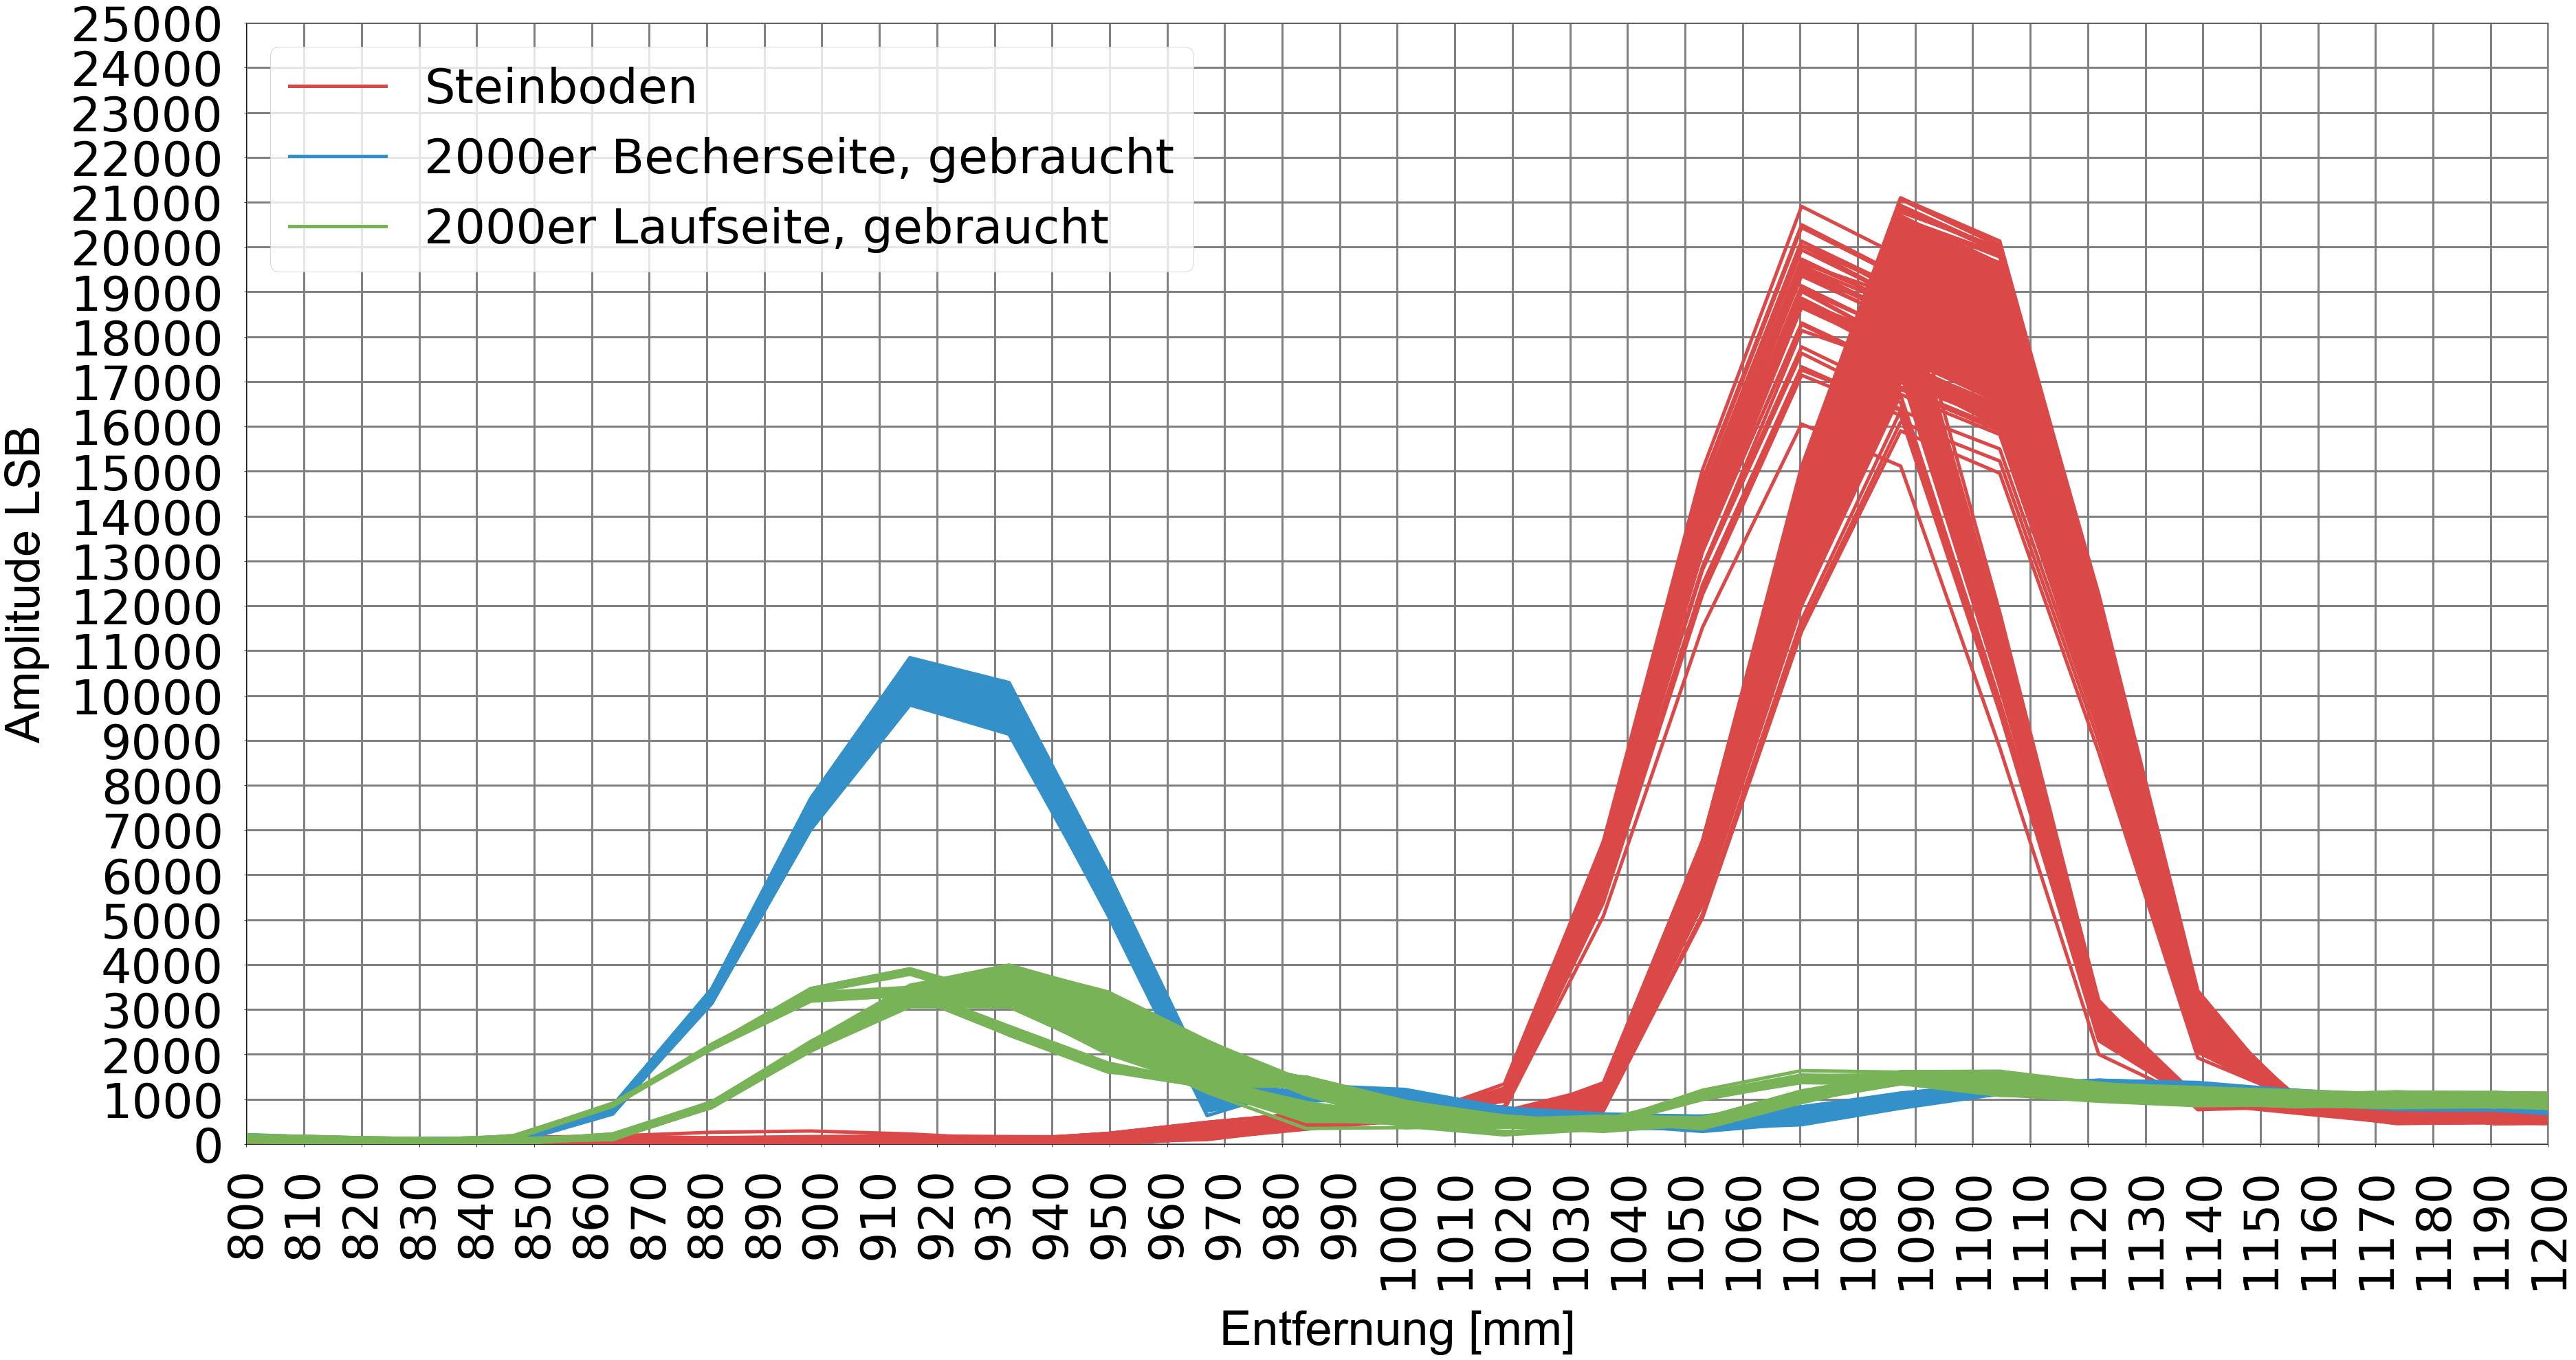

"\nif store != 0:\n    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'\n    figname = figname.replace(' ','_')\n    figname = figname.replace(':','-')\n    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)\n"

In [38]:
#plotname = 'Boden, Gurt 2000 alt, 850mm und 1000mm Entfernung'

nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)
#store = '04_features'

for j in range(len(dfbg.columns.values)):
    axs.plot(dfbg.index.values, dfbg[j], linewidth=5, color=rot)
axs.plot(dfbg.index.values, dfbg[j], linewidth=5, color=rot, label="Steinboden")
for i in range(len(dfbs850.columns.values)):
    axs.plot(dfbs850.index.values, dfbs850[i], linewidth=5, color=blau)
axs.plot(dfbs850.index.values, dfbs850[i], linewidth=5, color=blau, label="2000er Becherseite, gebraucht")
for i in range(len(dfls850.columns.values)):
    axs.plot(dfls850.index.values, dfls850[i], linewidth=5, color=gruen)
axs.plot(dfls850.index.values, dfls850[i], linewidth=5, color=gruen, label="2000er Laufseite, gebraucht")


axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlim(800,1200)
axs.set_ylim(0,25000)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(800,1200,41))
axs.set_yticks(np.linspace(0,25000,26))
axs.grid(True, axis='both', linewidth=3, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles, lables, fontsize=70, loc="best")

plt.show()

"""
if store != 0:
    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'
    figname = figname.replace(' ','_')
    figname = figname.replace(':','-')
    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)
"""

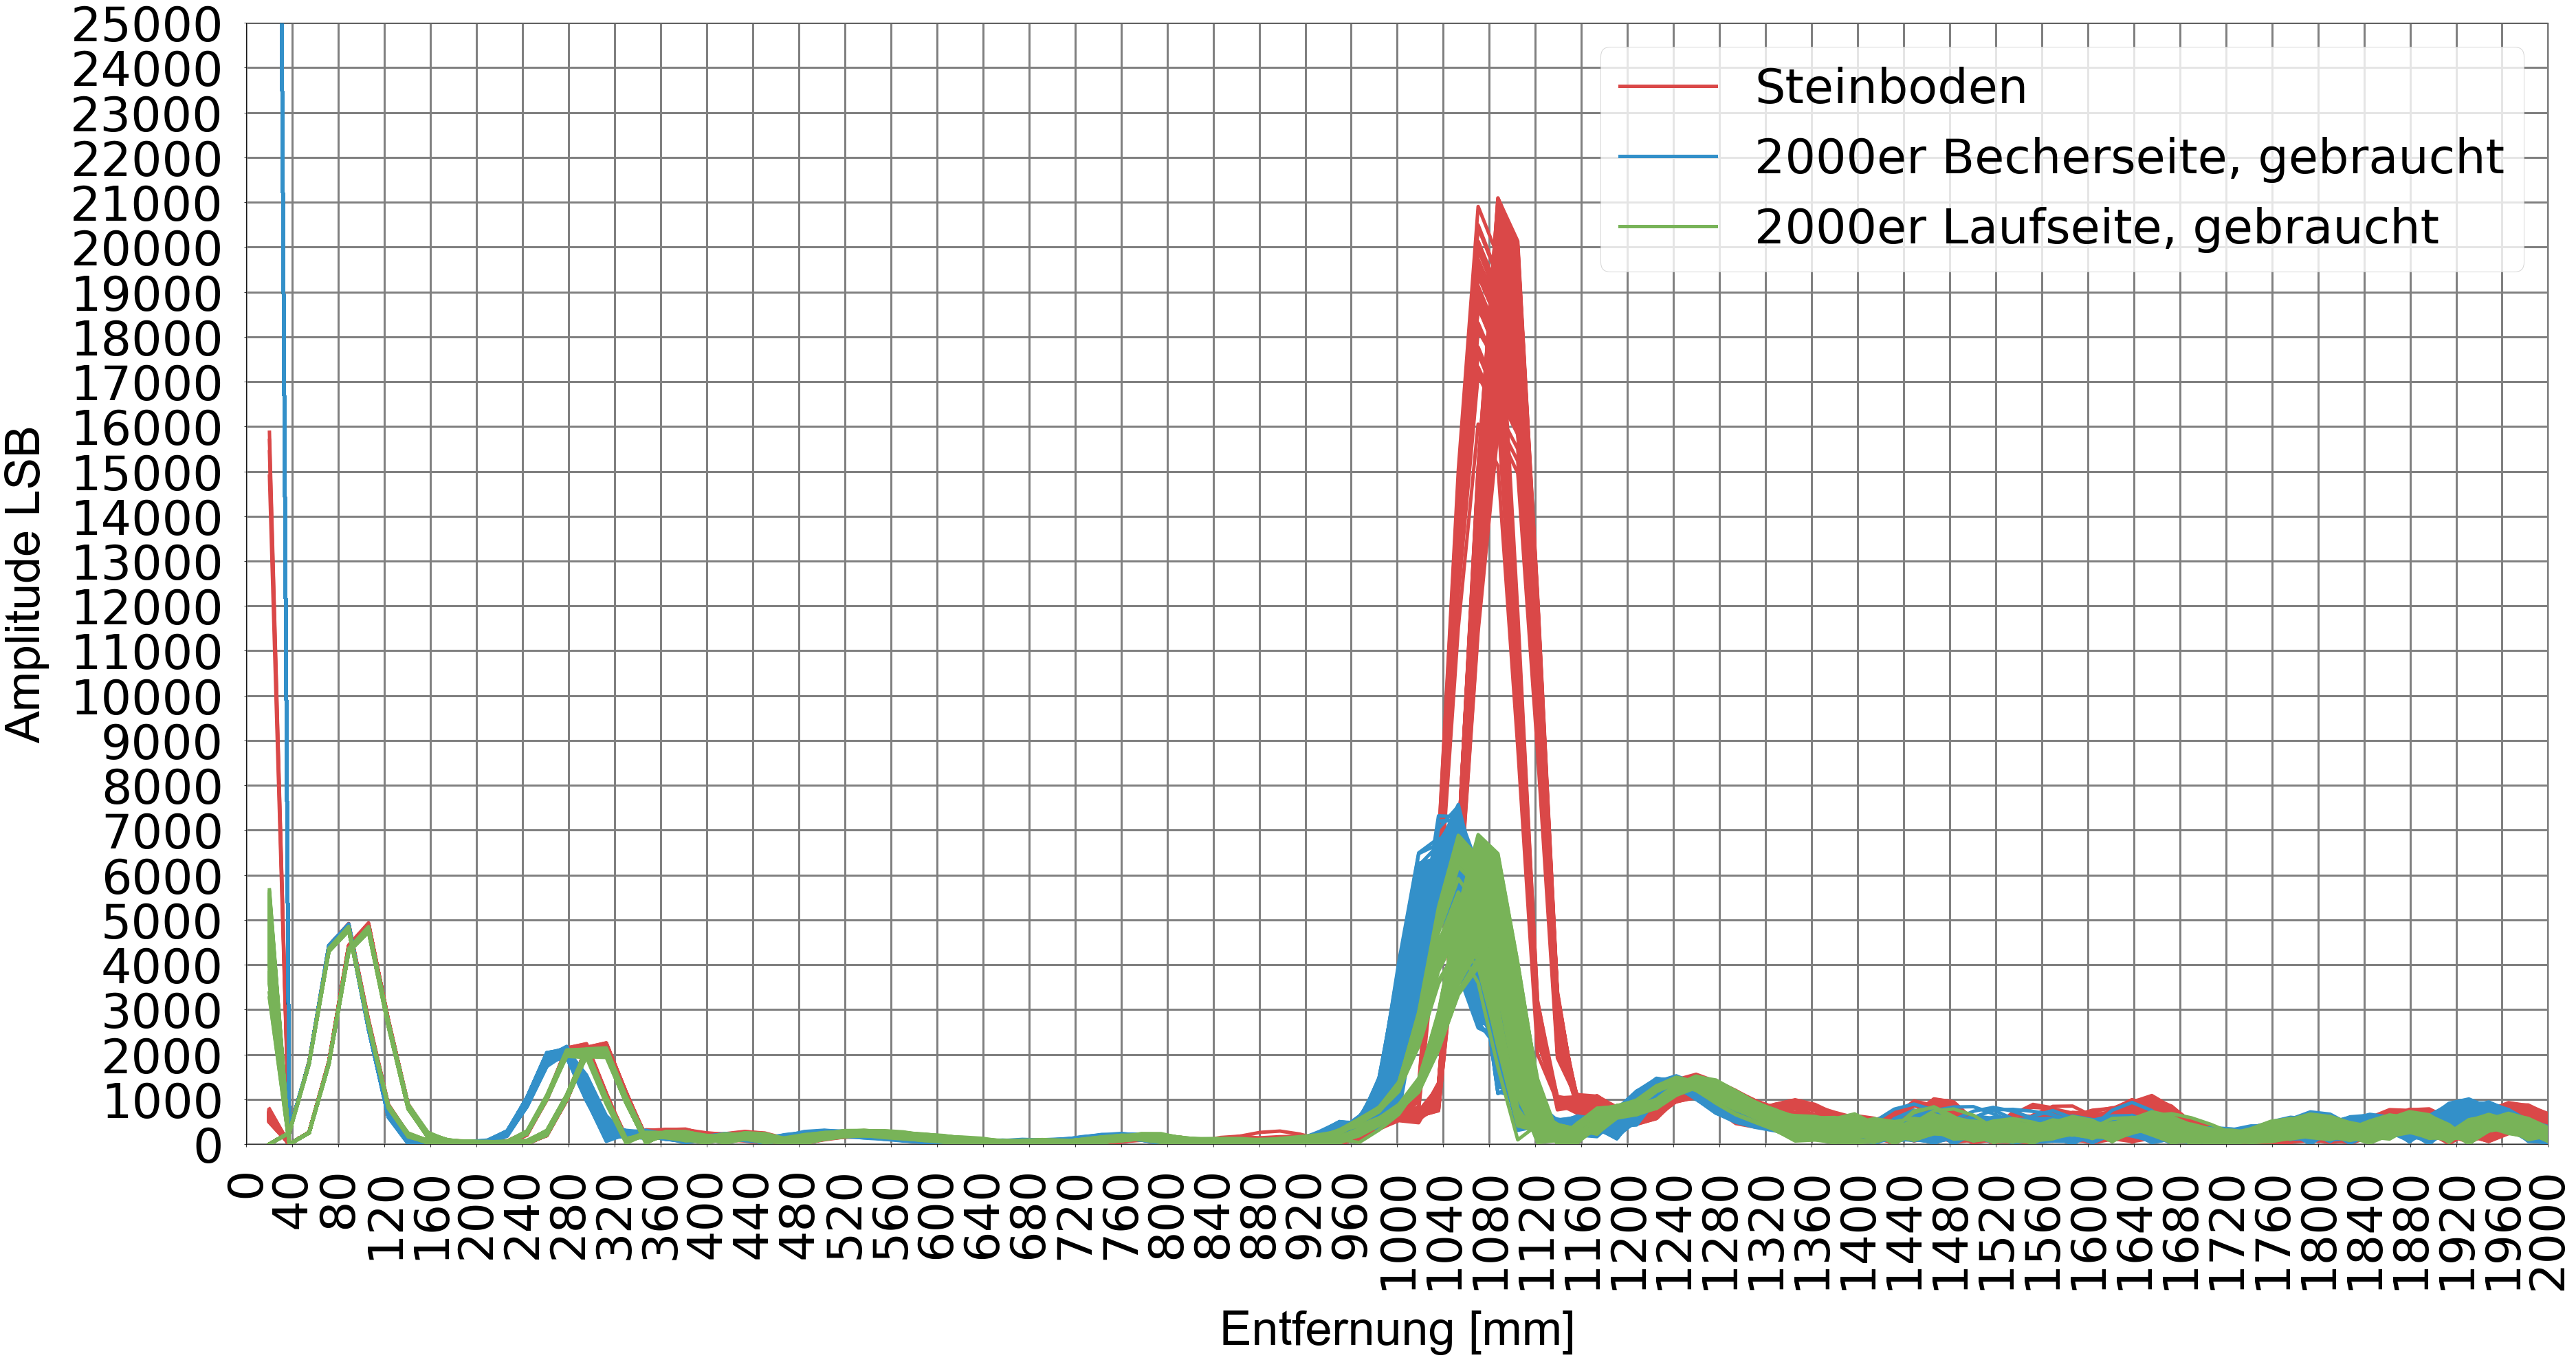

"\nif store != 0:\n    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'\n    figname = figname.replace(' ','_')\n    figname = figname.replace(':','-')\n    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)\n"

In [31]:
#plotname = 'Boden, Gurt 2000 alt, 10000mm Entfernung'

nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)
#store = '04_features'

for j in range(len(dfbg.columns.values)):
    axs.plot(dfbg.index.values, dfbg[j], linewidth=5, color=rot)
axs.plot(dfbg.index.values, dfbg[j], linewidth=5, color=rot, label="Steinboden")
for i in range(len(dfbs1000.columns.values)):
    axs.plot(dfbs1000.index.values, dfbs1000[i], linewidth=5, color=blau)
axs.plot(dfbs1000.index.values, dfbs1000[i], linewidth=5, color=blau, label="2000er Becherseite, gebraucht")
for i in range(len(dfls1000.columns.values)):
    axs.plot(dfls1000.index.values, dfls1000[i], linewidth=5, color=gruen)
axs.plot(dfls1000.index.values, dfls1000[i], linewidth=5, color=gruen, label="2000er Laufseite, gebraucht")


axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlim(0,1000)
axs.set_ylim(0,25000)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,2000,51))
axs.set_yticks(np.linspace(0,25000,26))
axs.grid(True, axis='both', linewidth=3, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles, lables, fontsize=70, loc="best")

plt.show()

"""
if store != 0:
    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'
    figname = figname.replace(' ','_')
    figname = figname.replace(':','-')
    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)
"""

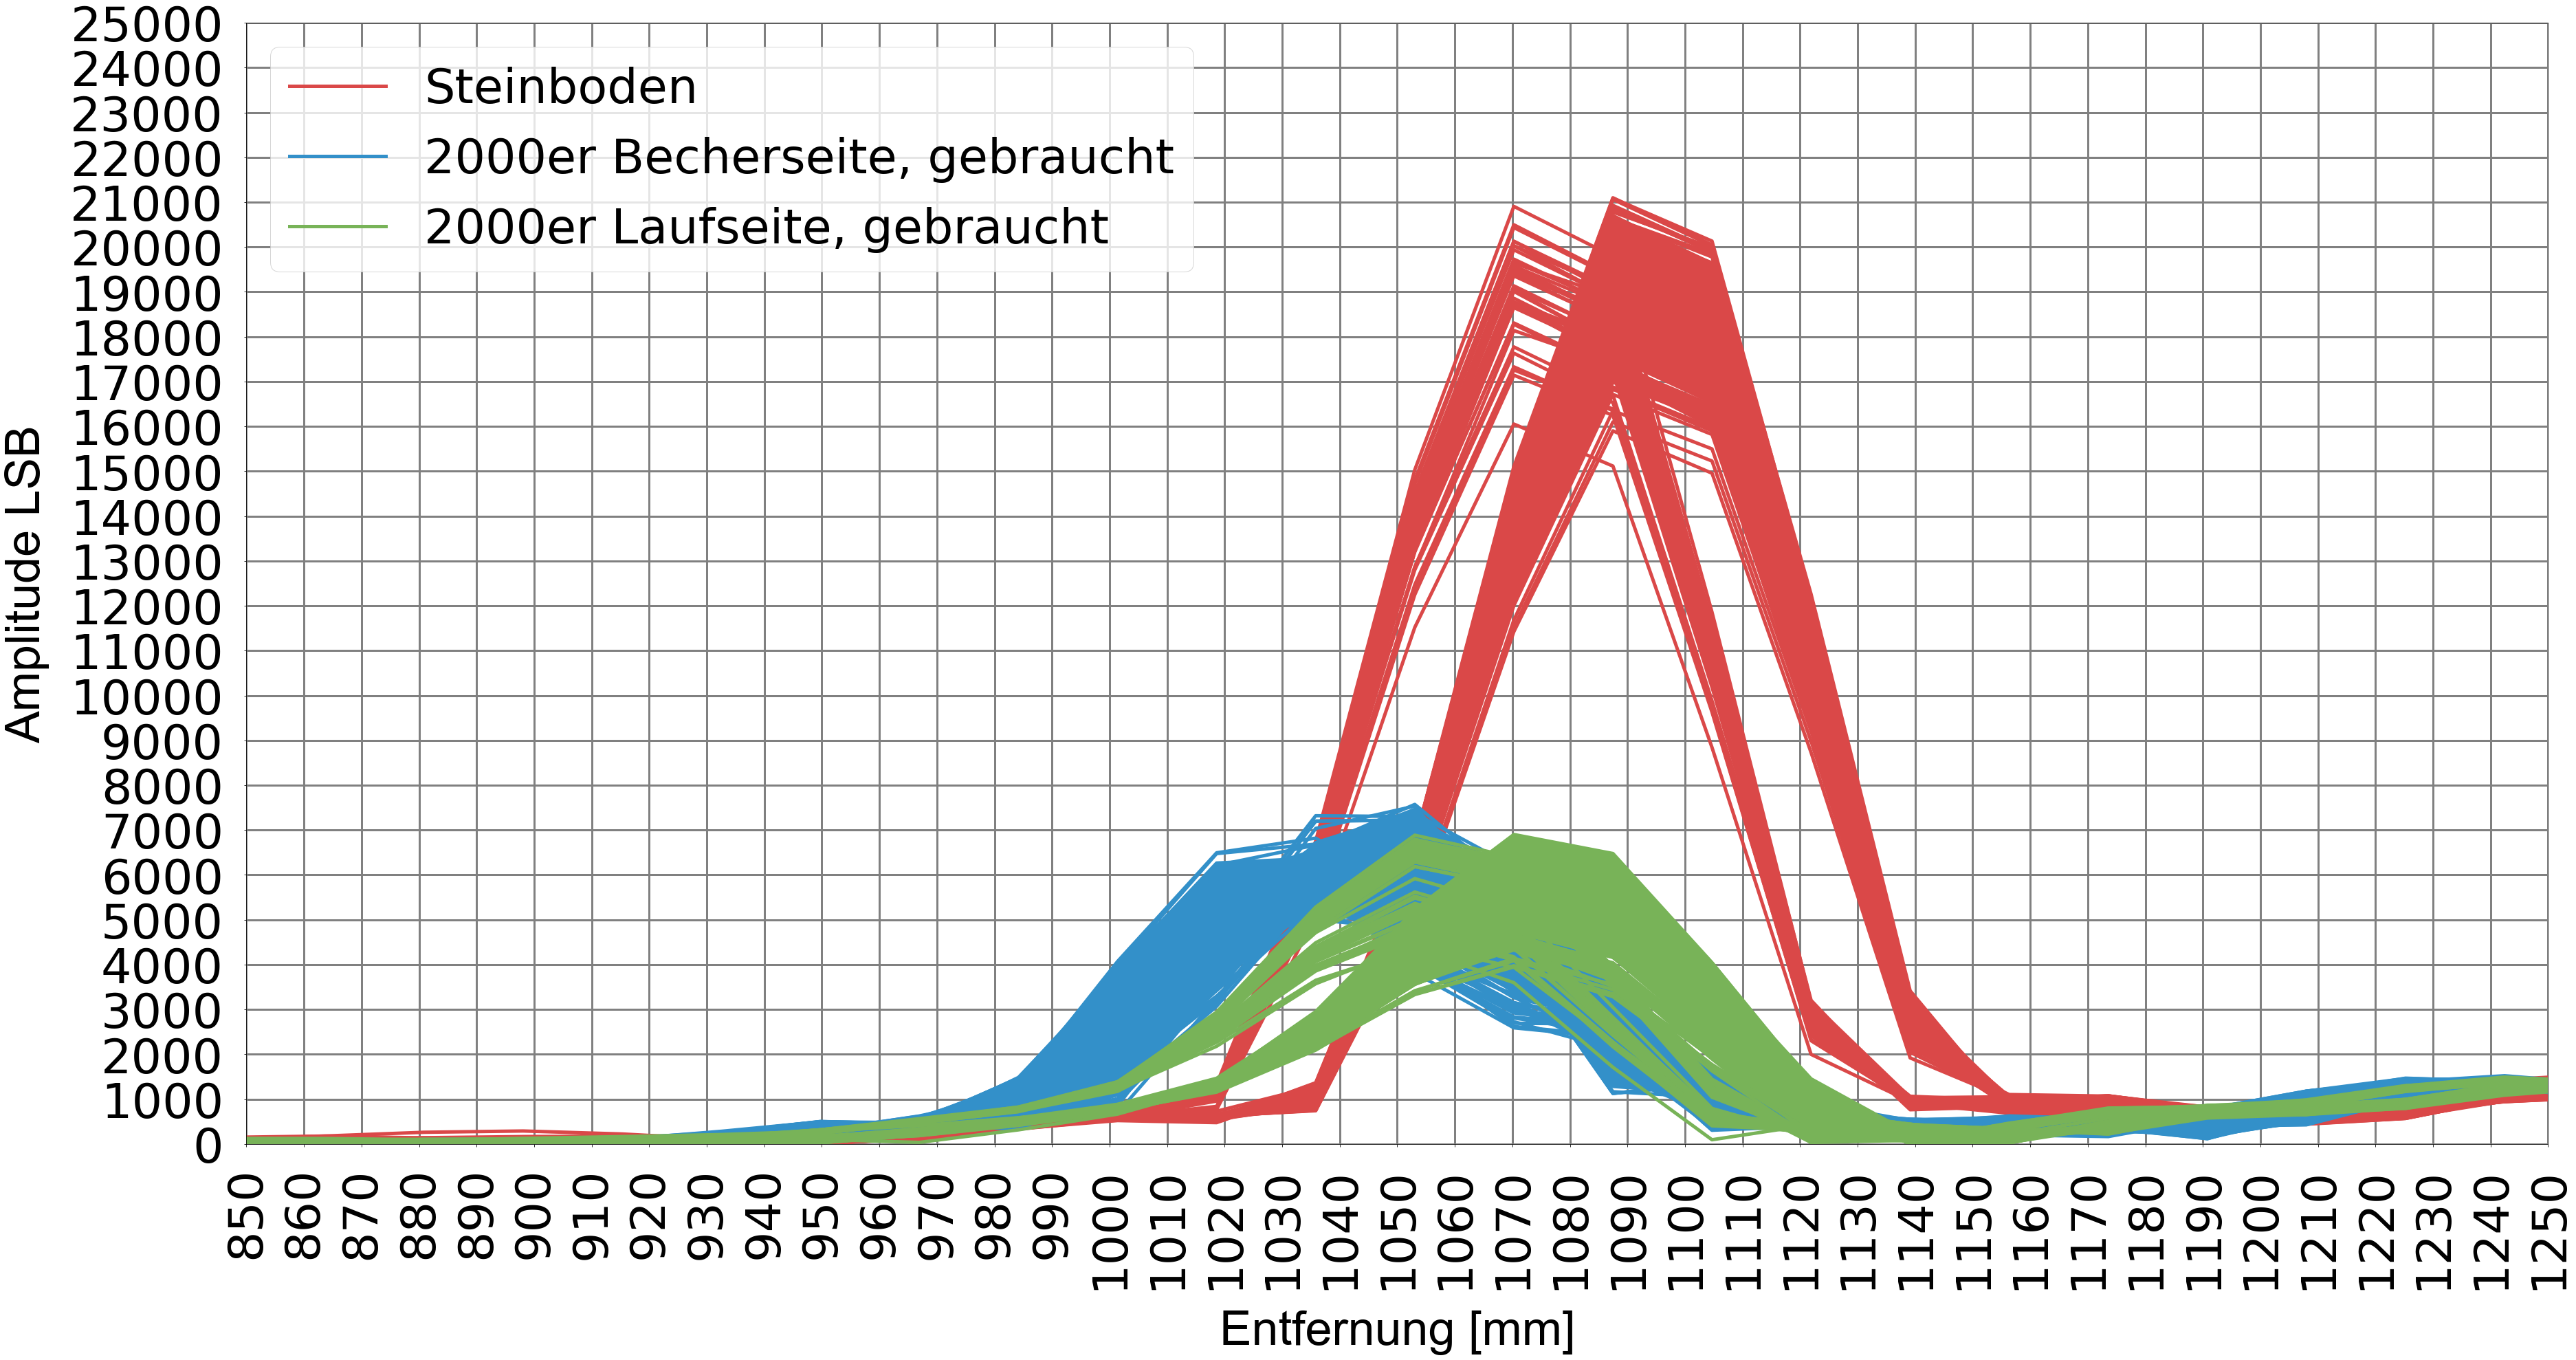

"\nif store != 0:\n    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'\n    figname = figname.replace(' ','_')\n    figname = figname.replace(':','-')\n    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)\n"

In [37]:
#plotname = 'Boden, Gurt 2000 alt, 10000mm Entfernung'

nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)
#store = '04_features'

for j in range(len(dfbg.columns.values)):
    axs.plot(dfbg.index.values, dfbg[j], linewidth=5, color=rot)
axs.plot(dfbg.index.values, dfbg[j], linewidth=5, color=rot, label="Steinboden")
for i in range(len(dfbs1000.columns.values)):
    axs.plot(dfbs1000.index.values, dfbs1000[i], linewidth=5, color=blau)
axs.plot(dfbs1000.index.values, dfbs1000[i], linewidth=5, color=blau, label="2000er Becherseite, gebraucht")
for i in range(len(dfls1000.columns.values)):
    axs.plot(dfls1000.index.values, dfls1000[i], linewidth=5, color=gruen)
axs.plot(dfls1000.index.values, dfls1000[i], linewidth=5, color=gruen, label="2000er Laufseite, gebraucht")


axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlim(850,1250)
axs.set_ylim(0,25000)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(850,1250,41))
axs.set_yticks(np.linspace(0,25000,26))
axs.grid(True, axis='both', linewidth=3, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles, lables, fontsize=70, loc="best")

plt.show()

"""
if store != 0:
    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'
    figname = figname.replace(' ','_')
    figname = figname.replace(':','-')
    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)
"""

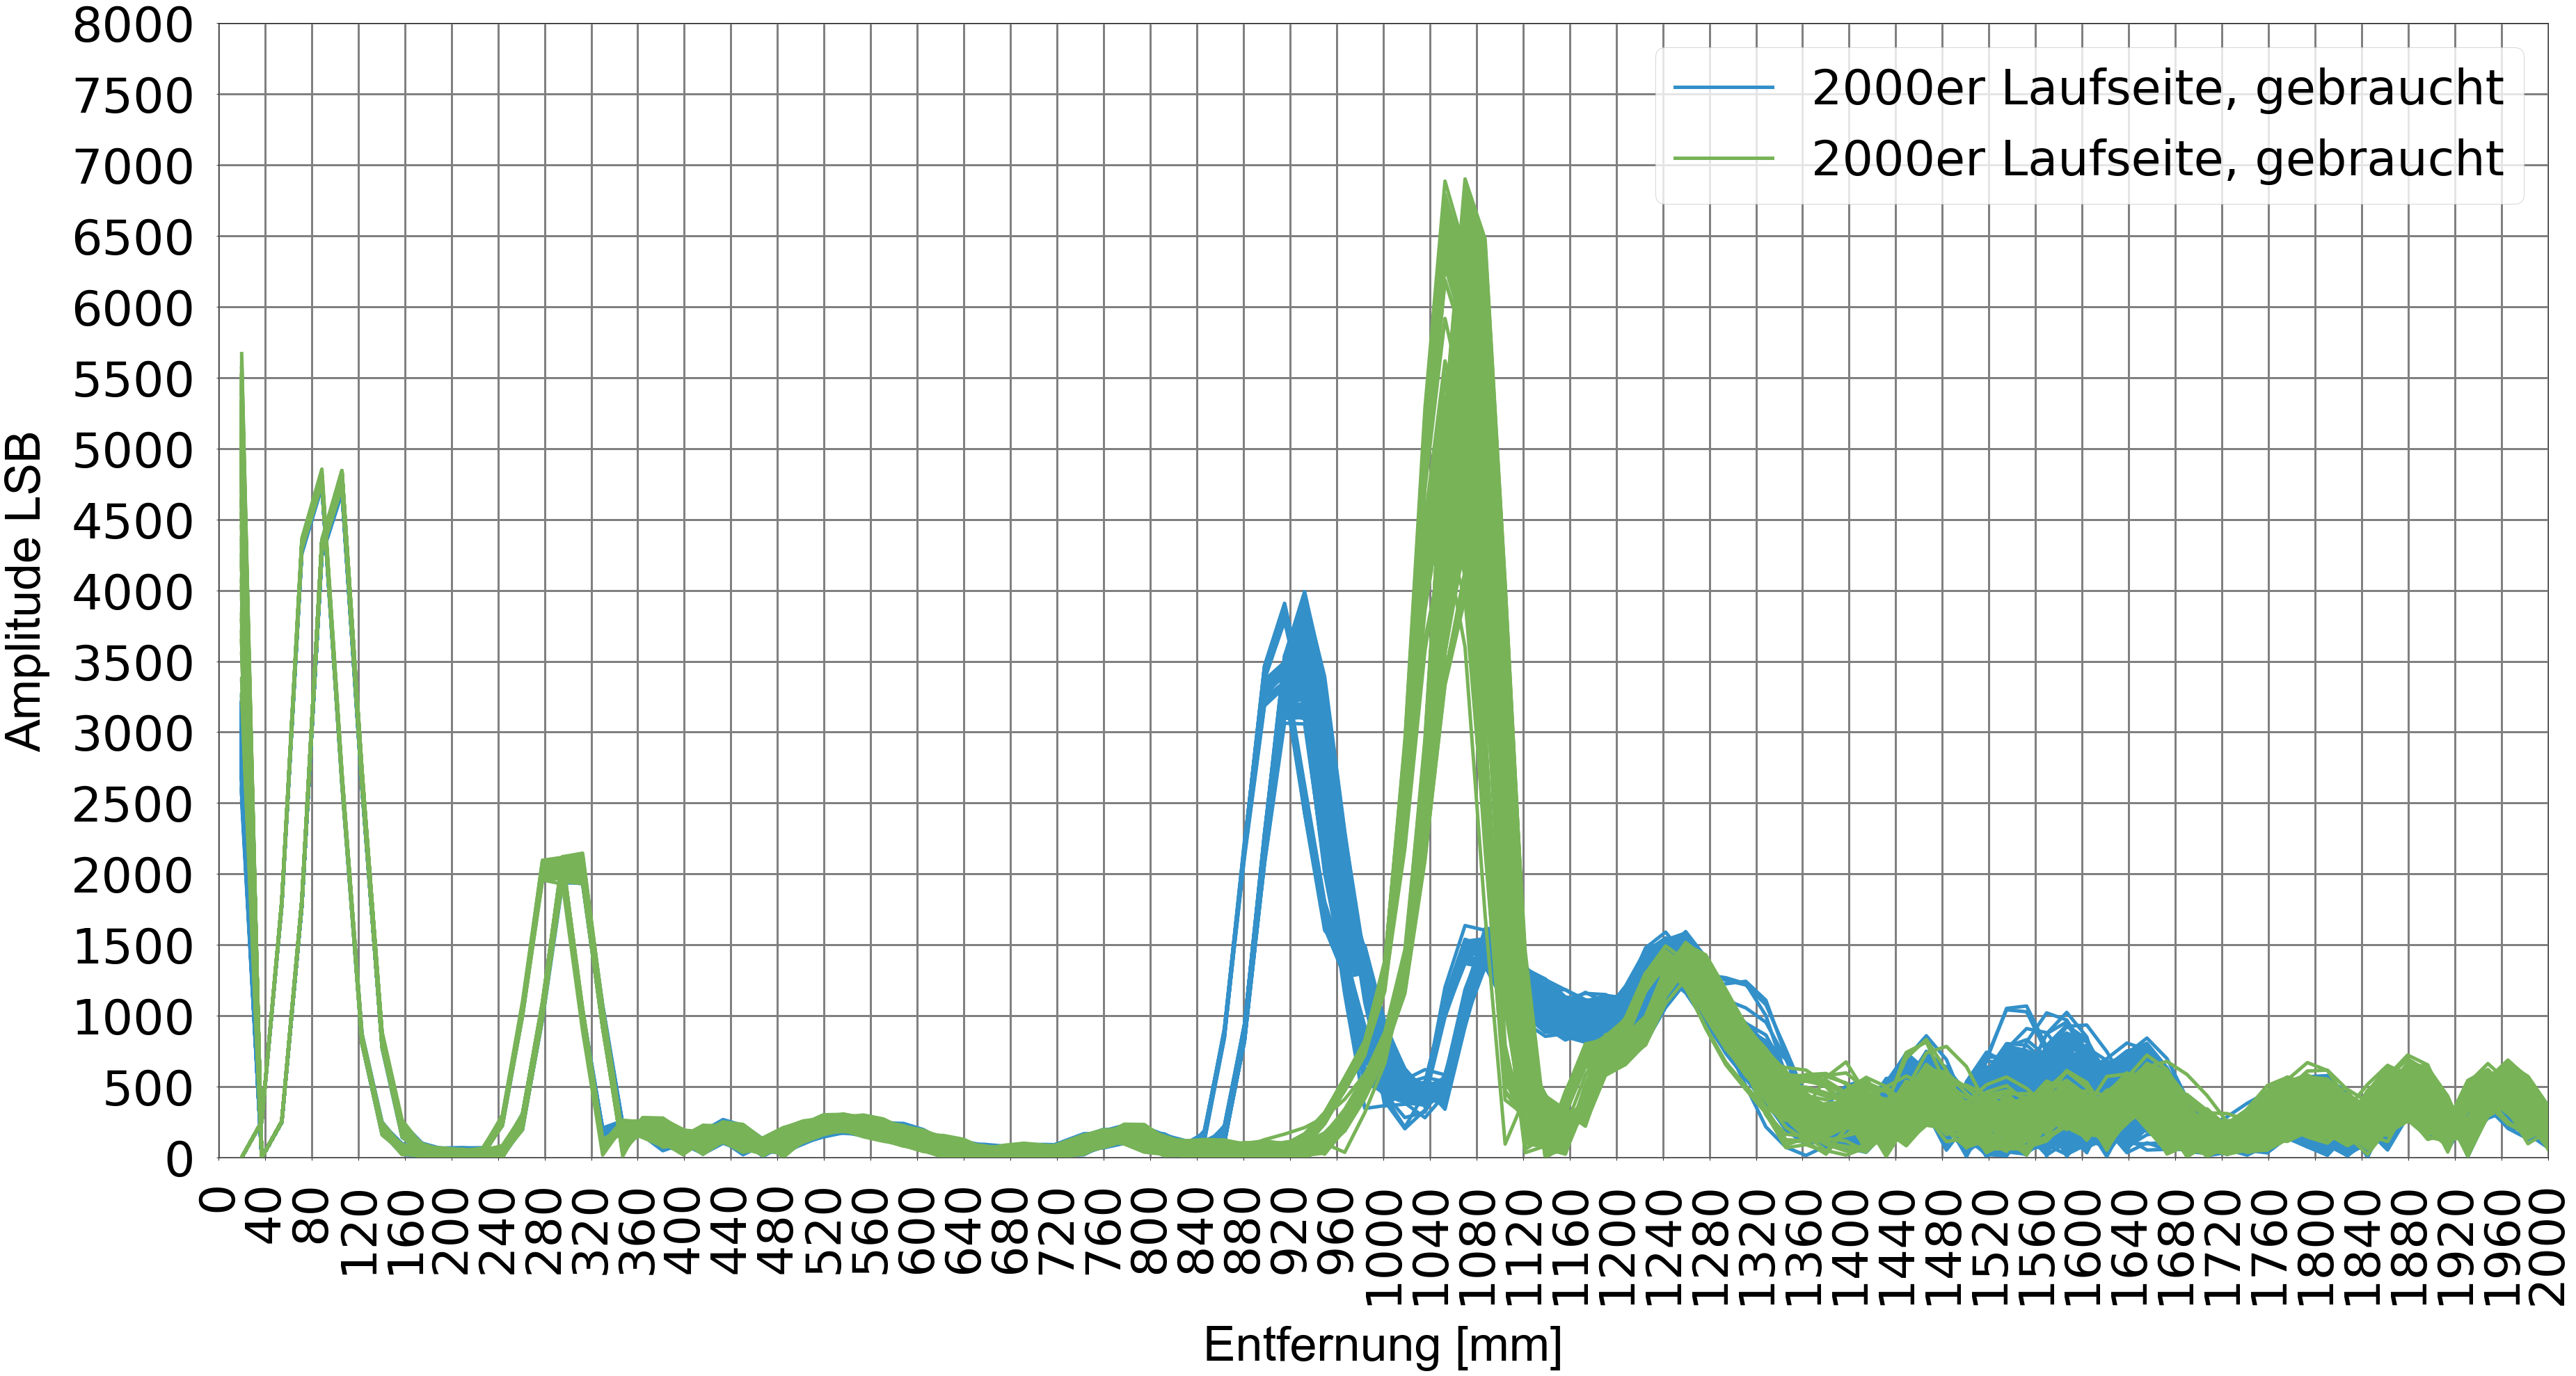

"\nif store != 0:\n    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'\n    figname = figname.replace(' ','_')\n    figname = figname.replace(':','-')\n    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)\n"

In [32]:
#plotname = 'Boden, Gurt 2000 alt, 10000mm Entfernung'

nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)
#store = '04_features'

for i in range(len(dfls850.columns.values)):
    axs.plot(dfls850.index.values, dfls850[i], linewidth=5, color=blau)
axs.plot(dfls850.index.values, dfls850[i], linewidth=5, color=blau, label="2000er Laufseite, gebraucht")
for i in range(len(dfls1000.columns.values)):
    axs.plot(dfls1000.index.values, dfls1000[i], linewidth=5, color=gruen)
axs.plot(dfls1000.index.values, dfls1000[i], linewidth=5, color=gruen, label="2000er Laufseite, gebraucht")


axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlim(0,1000)
axs.set_ylim(0,8000)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,2000,51))
axs.set_yticks(np.linspace(0,8000,17))
axs.grid(True, axis='both', linewidth=3, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles, lables, fontsize=70, loc="best")

plt.show()

"""
if store != 0:
    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'
    figname = figname.replace(' ','_')
    figname = figname.replace(':','-')
    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)
"""

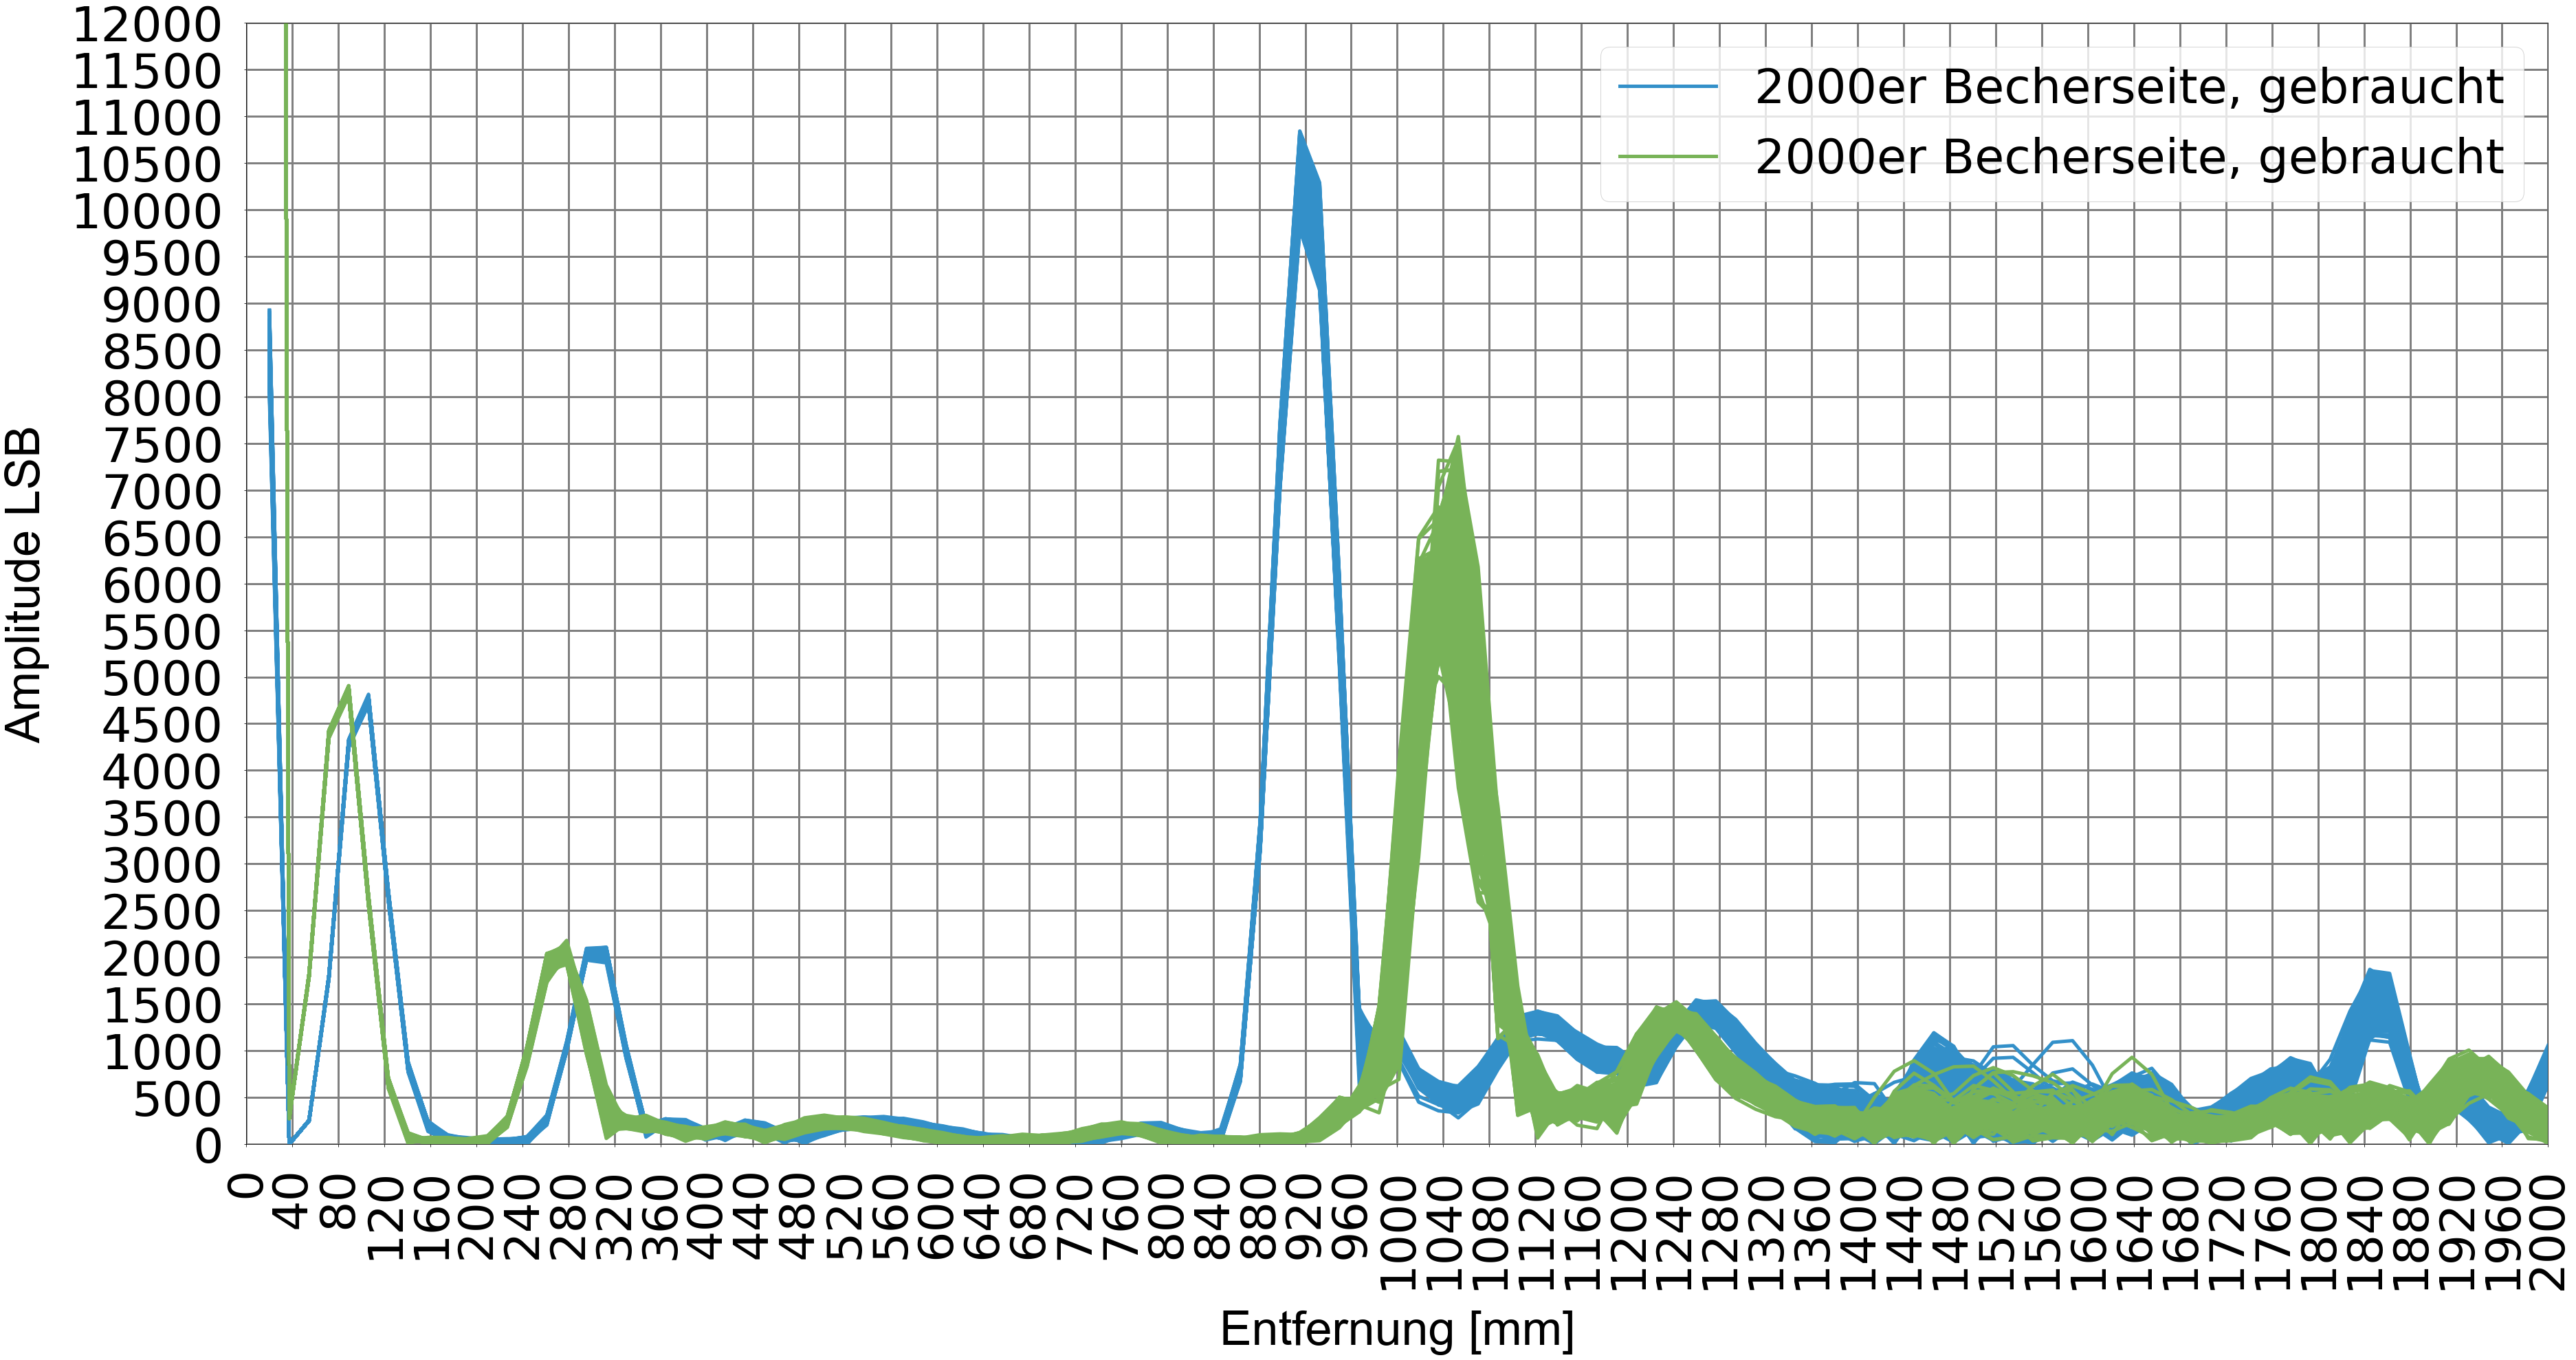

"\nif store != 0:\n    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'\n    figname = figname.replace(' ','_')\n    figname = figname.replace(':','-')\n    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)\n"

In [35]:
#plotname = 'Boden, Gurt 2000 alt, 10000mm Entfernung'

nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)
#store = '04_features'

for i in range(len(dfbs850.columns.values)):
    axs.plot(dfbs850.index.values, dfbs850[i], linewidth=5, color=blau)
axs.plot(dfbs850.index.values, dfbs850[i], linewidth=5, color=blau, label="2000er Becherseite, gebraucht")
for i in range(len(dfbs1000.columns.values)):
    axs.plot(dfbs1000.index.values, dfbs1000[i], linewidth=5, color=gruen)
axs.plot(dfbs1000.index.values, dfbs1000[i], linewidth=5, color=gruen, label="2000er Becherseite, gebraucht")


axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlim(0,1000)
axs.set_ylim(0,12000)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,2000,51))
axs.set_yticks(np.linspace(0,12000,25))
axs.grid(True, axis='both', linewidth=3, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles, lables, fontsize=70, loc="best")

plt.show()

"""
if store != 0:
    figname = str(plotname) + '_' + str(start)[:19] + '_' + str(end)[:19] + '.png'
    figname = figname.replace(' ','_')
    figname = figname.replace(':','-')
    fig.savefig('C:\\Users\\wth\\Documents\\02_BOOST\\Schrottband\\Kedro_Anomaly_Detection\\data\\' + store + '\\' + figname)
"""